## Click Through Rate - Analysis

## Final Project - Understanding variables affecting CTR of digital ad campaigns


Dataset Link: https://www.kaggle.com/louischen7/2020-digix-advertisement-ctr-prediction

### Project Description:

Click Through Rate in Digital Advertising is one of the most important metrics. It measures the number of clicks a particular advertiser received on their ad per the number of impressions (impressions = number of times the ad was shown to a user). It gives a broad view to the advertiser on how well their ad is received by the users. Following are some of the reasons why CTR is important for advertisers:

•	Gives a base of potential users who will convert

• Helps create a benchmark rate for future ad campaigns

• Aids in understanding which ad copy works better, from a call-to-action point of view

• Understand the dynamics and behavior of the target audience

## Research Plan:


### Significance of Study:
This study is extremely important for digital marketing managers of various companies that use internet marketing. This study deep dives into various variables that impact the click rate of a digital ad campaign. It further explores and explains which ad type is more clickable and also helps understand user behavior basis demographic variables such as age, gender, city rank, etc. This study will help the manager plan future digital campaigns keeping in mind the effect of each variable on click


### Research Objectives:
With the above research we will figure out which variables plays the key role in determining the click rate. 
This research  also determines how a particular value or feature of a variable attracts  more clicks as compared to the rest. And, we also proved a correlation between two variables and click rate.


### Anticipated Results
We strongly believe that certain ad types (inter_ad) attracts more clicks than the rest. And, similarly various variables like age, gender, net type, city rank are independently or coherently has an affect on click rate.

### Objective:

To understand which are the various variables that have an impact on the click rate and to what extent. 

### Assumptions:

1. Label: represents the status of clicking.

   0 - not clicked
   
   1 - Clicked
   

2. inter_type_cd: represents the display form of the ad.

   3 - Image
   
   4 - GIF
   
   5 - Videos


3. Gender: 

   0 - Female
   
   1 - Male
   
   2 - Others
   

4. Slot_id: represents the placement of the ad on the screen.

   11 to 22 - represents the various location of the ad placement.
   

5. Net_type: represents the status of the net.

   2 to 6 - 2 being the weakest and 6 being the strongest.   
   
   
6. City_rank: represents Level of the resident city of a user

   2 to 5: 2 being the lowest and 5 being highest.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import random
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

## About the Data

In [37]:
#Since the dataset contains 1 millions entries, we are selecting the random 100,000 entries.

file='/Users/vikasjangra/Documents/MS BA/Fall 2021/BAN 4550 Analytics Programming/Project - AP/CTR DIGIX Dataset/archive/Train.csv'
num_lines = sum(1 for l in open(file))
num_lines
skip = sorted(random.sample(range(1,num_lines+1),num_lines-100000)) #selecting the random 100,000 data entries
orig_file=pd.read_csv(file , skiprows=skip)
pd.set_option('max_columns', None)
df=orig_file.copy()
df.head()

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0,1718762,5224,4790,6,175,60,4,18,34,13,2,25,1,287,2,99,141,9,3,2,36,-1,-1,1,14,12,2,1,-1,-1,2,21^22^23,3,24,1
1,0,1567652,5086,6793,7,193,37,5,21,50,37,4,21,1,157,3,65,141,9,4,2,35,6,3,2,20,10,2,20,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,17,1
2,0,1068169,1374,3702,7,171,27,5,12,12,37,4,21,7,186,5,88,180,9,2,2,39,18,2,2,14,7,3,-1,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,11,27,1
3,0,1216872,2112,6869,7,207,17,5,12,13,37,4,21,5,402,4,88,180,4,4,2,38,4,2,2,20,7,3,-1,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,17,1
4,0,1198258,1177,5183,4,112,60,3,14,78,23,2,23,4,108,4,32,141,4,2,2,29,-1,-1,1,20,4,5,18,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,12,24,1


### Data Dictionary

1. label - Label
2. uid -  Unique user ID after data anonymization
3. task_id -  Unique ID of an ad task
4. adv_id -  Unique ID of an ad material
5. creat_type_cd -  Unique ID of an ad creative type
6. adv_prim_id -  Advertiser ID of an ad task
7. dev_id -  Developer ID of an ad task
8. inter_typ_cd -  Display form of an ad material
9. slot_id -  Ad slot ID
10. spread_app_id -  App ID of an ad task
11. tags -  App tag of an ad task
12. app_first_class -  App level-1 category of an ad task
13. app_second_class -  App level-2 category of an ad task
14. age -  User age
15. city -  Resident city of a user
16. city_rank -  Level of the resident city of a user
17. device_name -  Phone model used by a user
18. device_size -  Size of the phone used by a user
19. career -  User occupation
20. gender -  User gender
21. net_type -  Network status when a behavior occurs
22. residence -  Resident province of a user
23. his_app_size -  App storage size
24. his_on_shelf_time -  Release time
25. app_score -  App rating score
26. emui_dev -  EMUI version
27. list_time -  Model release time
28. device_price -  Device price
29. up_life_duration -  HUAWEI ID lifecycle
30. up_membership_grade -  Service membership level
31. membership_life_duration -  Membership lifecycle
32. consume_purchase -  Paid user tag
33. communication_onlinerate -  Active time by mobile phone
34. communication_avgonline_30d -  Daily active time by mobile phone
35. indu_name -  Ad industry information
36. pt_d -  Date when a behavior occurs

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   label                        100000 non-null  int64 
 1   uid                          100000 non-null  int64 
 2   task_id                      100000 non-null  int64 
 3   adv_id                       100000 non-null  int64 
 4   creat_type_cd                100000 non-null  int64 
 5   adv_prim_id                  100000 non-null  int64 
 6   dev_id                       100000 non-null  int64 
 7   inter_type_cd                100000 non-null  int64 
 8   slot_id                      100000 non-null  int64 
 9   spread_app_id                100000 non-null  int64 
 10  tags                         100000 non-null  int64 
 11  app_first_class              100000 non-null  int64 
 12  app_second_class             100000 non-null  int64 
 13  age            

#### Dataset Information

#### Data Cleaning and information

In [4]:
df.isnull().sum()

label                          0
uid                            0
task_id                        0
adv_id                         0
creat_type_cd                  0
adv_prim_id                    0
dev_id                         0
inter_type_cd                  0
slot_id                        0
spread_app_id                  0
tags                           0
app_first_class                0
app_second_class               0
age                            0
city                           0
city_rank                      0
device_name                    0
device_size                    0
career                         0
gender                         0
net_type                       0
residence                      0
his_app_size                   0
his_on_shelf_time              0
app_score                      0
emui_dev                       0
list_time                      0
device_price                   0
up_life_duration               0
up_membership_grade            0
membership

### There are no null values in the dataset.


In [5]:
# Creating the histogram of all the columns in the dataset.
#df.hist(figsize=(40,30), bins=50) 

#### Creating a correlation of the dataset.

In [6]:
corr_df=df.corr()
corr_df

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d
label,1.000000,-0.000822,-0.001574,0.011048,0.003622,0.033426,-0.030881,0.025719,-3.916567e-02,-0.005666,0.032221,0.044423,-0.010865,-0.013878,0.008309,-2.724067e-02,-0.013132,0.015765,0.038805,0.005860,-0.012235,-0.001714,0.013738,0.042348,0.042690,-0.022404,0.010213,-0.053862,-0.024188,-0.012772,-0.000099,-0.008522,-0.033593,-0.021086,NaN
uid,-0.000822,1.000000,-0.004188,0.000383,-0.001477,-0.002498,-0.000278,-0.002722,-1.808692e-03,0.007629,0.000724,-0.000523,-0.001472,-0.000015,0.002360,2.106730e-03,-0.000195,-0.002885,-0.002014,0.003417,0.000546,-0.000609,-0.005118,0.000026,-0.000385,0.002717,0.000541,0.004615,0.004475,0.001235,0.000442,-0.001639,0.000257,0.004281,NaN
task_id,-0.001574,-0.004188,1.000000,0.007158,0.055389,0.024770,-0.004908,0.029702,7.933077e-04,-0.123420,-0.090149,-0.032445,-0.132964,-0.002985,0.003054,-3.199617e-02,-0.006199,-0.010901,-0.002207,0.018899,-0.075503,0.003975,-0.011141,-0.042947,-0.016880,-0.014120,-0.008820,-0.029966,-0.004754,-0.006241,-0.007989,0.012397,-0.000625,0.001426,NaN
adv_id,0.011048,0.000383,0.007158,1.000000,0.018440,0.031360,-0.083595,0.026320,-1.189734e-02,-0.035512,-0.073110,0.041700,0.025260,-0.004548,0.008071,-1.103989e-02,0.005696,0.009184,0.012092,0.028326,-0.012668,-0.005036,0.125116,0.012215,0.044833,-0.011142,0.014821,-0.039779,-0.012596,-0.006405,0.006703,-0.009349,-0.018423,-0.021428,NaN
creat_type_cd,0.003622,-0.001477,0.055389,0.018440,1.000000,0.104981,-0.257759,0.305151,-1.265240e-03,-0.333620,0.038874,0.232086,-0.276676,-0.062400,0.005340,-3.785763e-02,0.005126,0.000483,0.012331,0.077419,-0.286825,-0.000677,0.073369,0.225276,0.241419,-0.021761,0.031079,-0.071297,-0.014871,-0.015290,-0.000164,0.015822,-0.012993,-0.244144,NaN
adv_prim_id,0.033426,-0.002498,0.024770,0.031360,0.104981,1.000000,-0.073758,0.195306,-1.703646e-02,-0.351943,0.247534,0.293966,-0.146355,-0.036979,0.004445,-5.710560e-02,0.002268,-0.010450,0.025564,0.037655,-0.223088,0.003126,0.089896,0.245003,0.281310,-0.026819,0.023164,-0.046139,-0.025624,-0.021884,0.001996,-0.019274,-0.007997,-0.220141,NaN
dev_id,-0.030881,-0.000278,-0.004908,-0.083595,-0.257759,-0.073758,1.000000,-0.442273,3.032477e-02,0.347315,-0.269049,-0.531276,0.252908,0.016471,-0.006172,5.501784e-02,0.012660,0.028580,-0.054166,-0.072067,0.294343,-0.001285,0.017582,-0.414835,-0.516864,0.059564,-0.031690,0.149790,0.064684,0.043678,-0.003850,0.061596,0.023004,0.120834,NaN
inter_type_cd,0.025719,-0.002722,0.029702,0.026320,0.305151,0.195306,-0.442273,1.000000,1.960317e-02,-0.306064,0.553471,0.596262,-0.155988,-0.020990,0.010631,-9.130175e-02,-0.007965,-0.045300,0.091244,0.051004,-0.489629,0.002694,0.302107,0.579924,0.604381,-0.077772,0.043978,-0.200892,-0.086190,-0.047257,0.005296,-0.033576,-0.023187,-0.264419,NaN
slot_id,-0.039166,-0.001809,0.000793,-0.011897,-0.001265,-0.017036,0.030325,0.019603,1.000000e+00,-0.045347,0.006417,0.004597,-0.008364,-0.005637,-0.000580,5.646591e-07,-0.019426,0.087079,-0.004443,0.004868,-0.006481,0.004225,0.032913,0.004110,0.006558,0.005297,-0.024548,0.033933,0.009321,0.006248,-0.000365,0.006845,0.002301,-0.015476,NaN
spread_app_id,-0.005666,0.007629,-0.123420,-0.035512,-0.333620,-0.351943,0.347315,-0.306064,-4.534723e-02,1.000000,-0.038658,-0.305826,0.336308,0.010388,-0.008437,3.307231e-02,-0.001232,0.014934,-0.034304,-0.048185,0.338144,0.002564,-0.158614,-0.192615,-0.304762,0.052195,-0.039212,0.103730,0.034662,0.019779,-0.003977,0.022749,0.003210,0.263995,NaN


### Creating a heatmap relationship among a the variables in the dataset. 

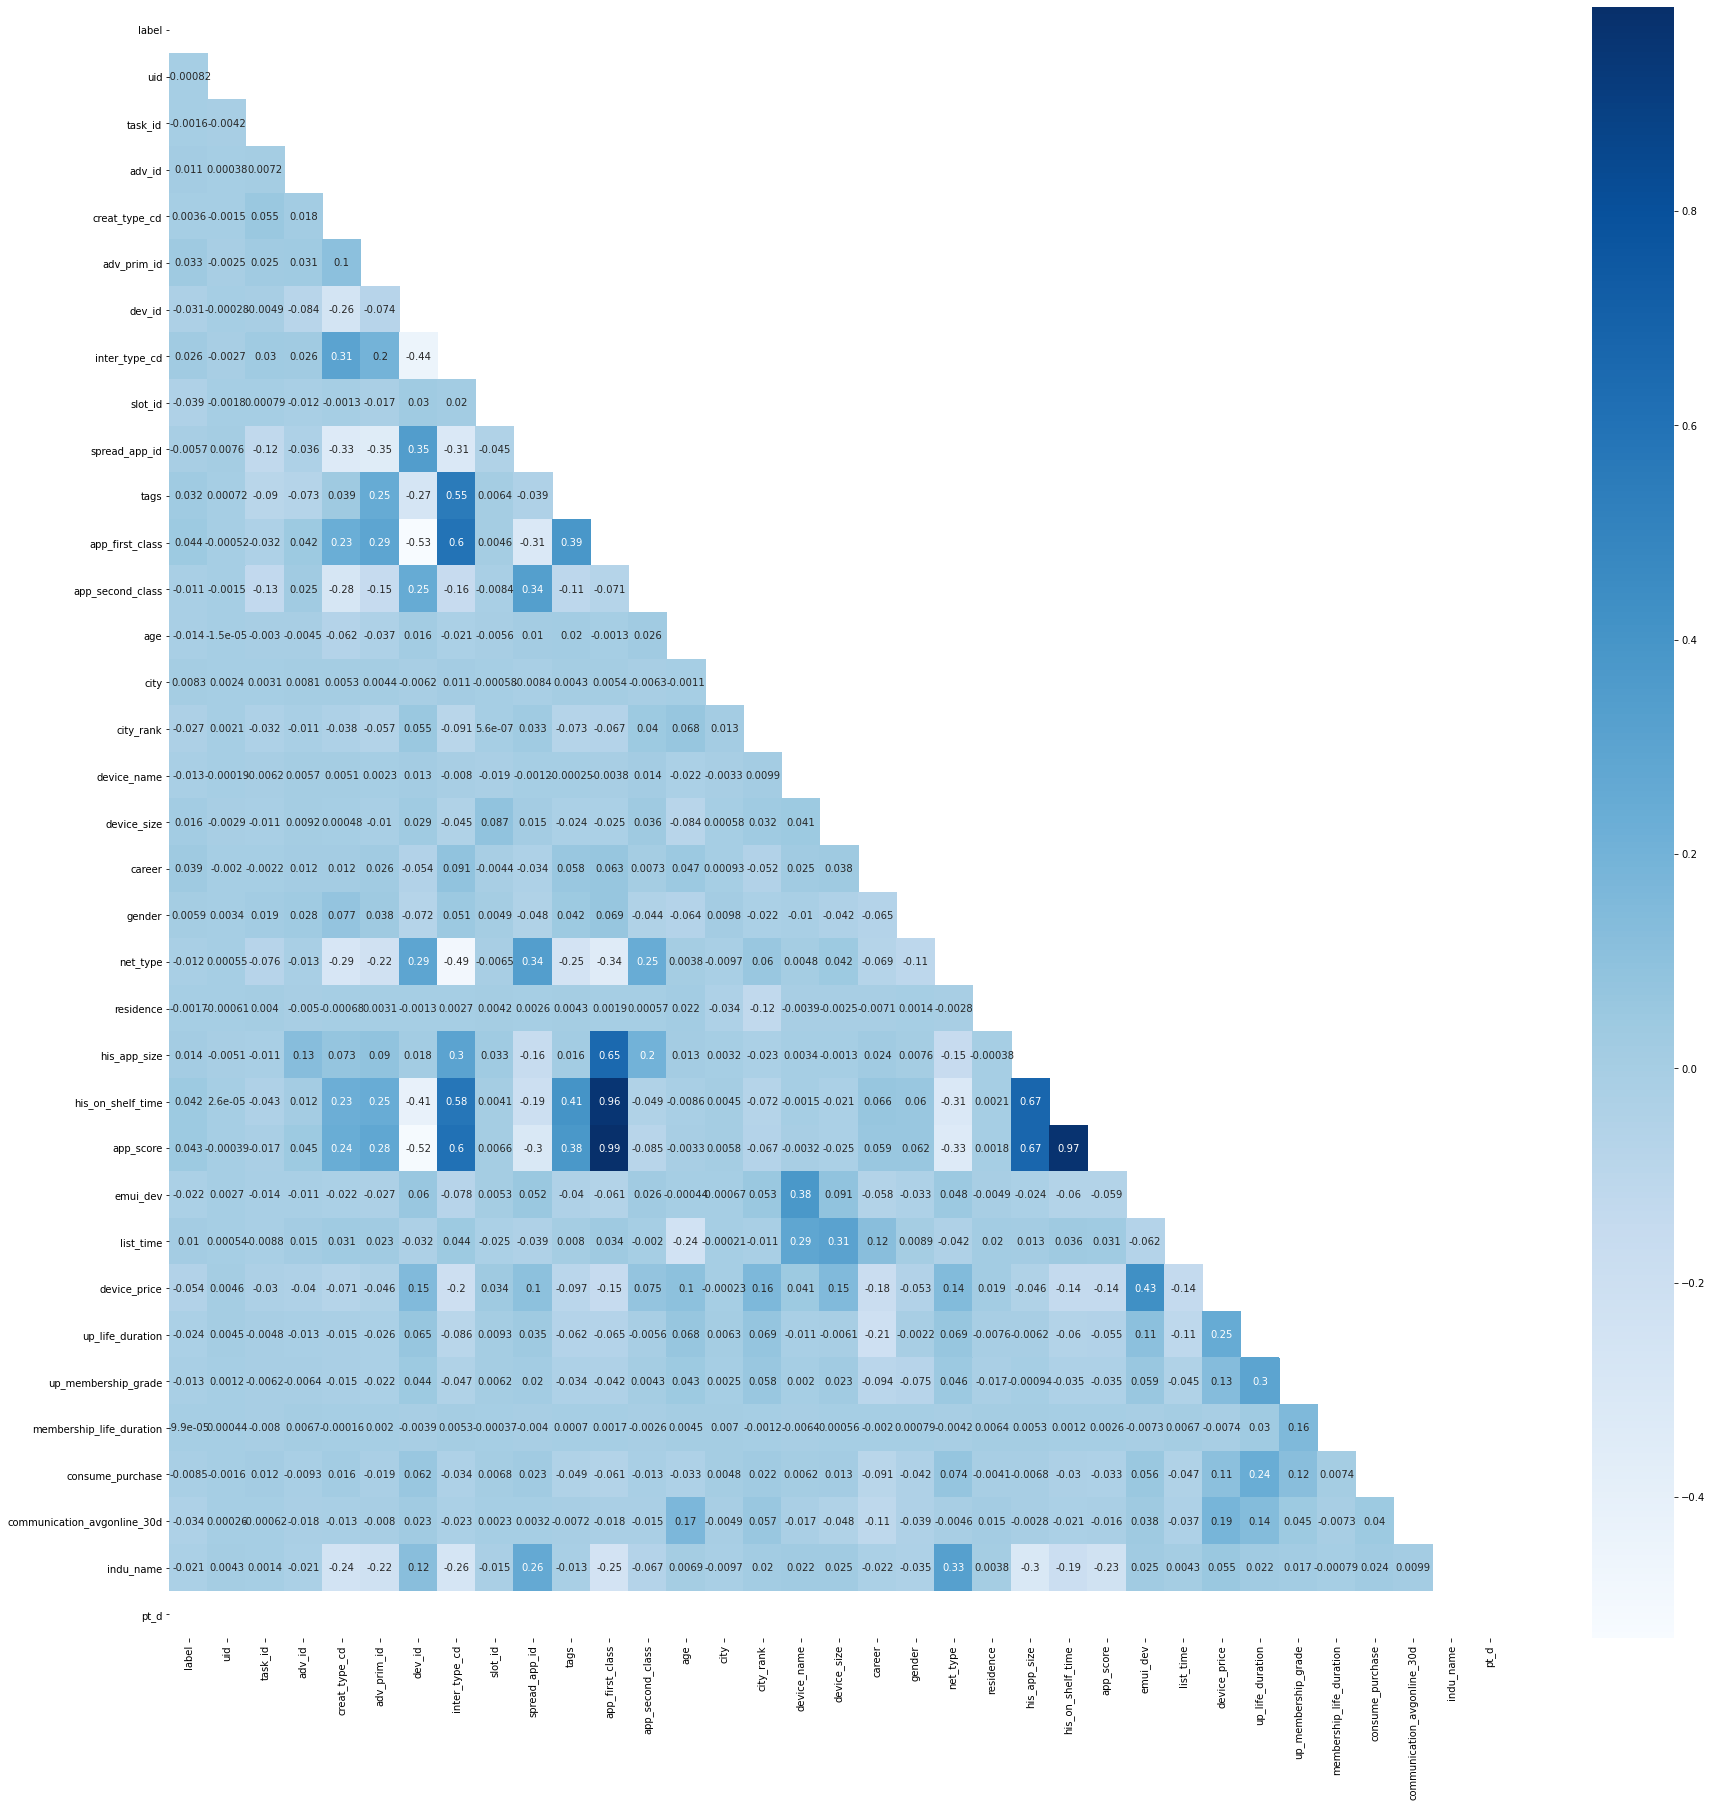

In [7]:
plt.figure(figsize=(30, 30))      # Credit is to be given to the coder.
mask = np.zeros_like(corr_df) #masking the null values of the upper half triangle.
mask[np.triu_indices_from(mask)] = True
corr_heatmap=sns.heatmap(df.corr(),cmap="Blues", annot=True,mask=mask) #creating the heatmap witht the blue color.

The heat map predicts the correlations among the variables here. 

Some variables provide cardinal relation among the variables that are useful for the decisons makers. 

Upon careful review of the above heatmap, it is evident that App rating score (app_score) has a strong positive relation to display form of an ad (inter_typ_cd) - it might suggest that some ad forms are better than others to increase popularity of an app.

### Calculating the total number of the clicks and the not clicks.

#### 0 --> Not Clicked
#### 1 --> Clicked.

In [8]:
click_count=df['label'].value_counts()
click_count

#click_count.cumsum()

0    96297
1     3703
Name: label, dtype: int64

In [9]:
rel_freq_click=click_count/len(df)
rel_freq_click

0    0.96297
1    0.03703
Name: label, dtype: float64

<AxesSubplot:ylabel='label'>

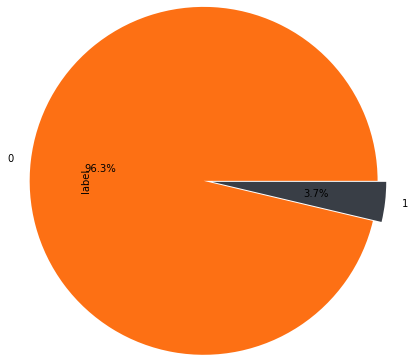

In [64]:
click_count.plot(kind='pie',autopct='%1.1f%%',radius=2,colors=colors,explode=(0, 0.1))

Among all the users (100,000 user), approximately of 3.7% user, i.e., 3700 user clicks on the advertisement published.

## Hypotheses 1

H0 – The type of an ad (video, image, GIF, etc.) has no effect on the click rate. 

H1 – The type of an ad (video, image, GIF, etc.) influences the click rate. 

In [11]:
df.inter_type_cd.unique()

array([5, 3, 4])

In [12]:
#calculating the number of clicks at different platforms.

len_Clicked_5 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5)])
len_notClicked_5 = len(df.loc[(df.label == 0) & (df.inter_type_cd == 5)])


len_Clicked_4 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4)])
len_notClicked_4 = len(df.loc[(df.label == 0) & (df.inter_type_cd == 4)])

len_Clicked_3 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3)])
len_notClicked_3 = len(df.loc[(df.label == 0) & (df.inter_type_cd == 3)])

print("len_Clicked_5 -->  ",len_Clicked_5)
print('len_notClicked_5 -->',len_notClicked_5)
print()
print("len_Clicked_4 -->  ",len_Clicked_4)
print('len_notClicked_4 -->',len_notClicked_4)
print()
print("len_Clicked_3 -->  ",len_Clicked_3)
print('len_notClicked_3 -->',len_notClicked_3)

df_Clicked=[len_Clicked_5,len_Clicked_4,len_Clicked_3]
df_notClicked=[len_notClicked_5,len_notClicked_4,len_notClicked_3]

df_clicks=[df_Clicked,df_notClicked]


len_Clicked_5 -->   3078
len_notClicked_5 --> 77495

len_Clicked_4 -->   479
len_notClicked_4 --> 9257

len_Clicked_3 -->   146
len_notClicked_3 --> 9545


In [13]:
value_5=[len_notClicked_5,len_Clicked_5]
df_5 = pd.DataFrame(value_5, columns = ['Clicks'])
df_5

,Clicks
0,77495
1,3078


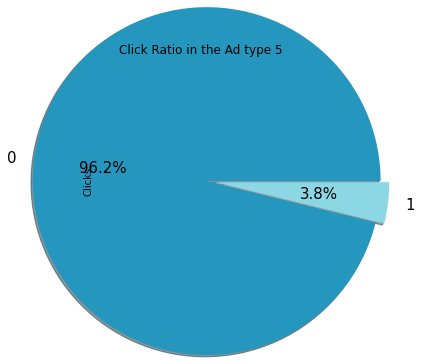

In [67]:

plot = df_5.plot.pie( title="Click Ratio in the Ad type 5", legend=False, \
                   autopct='%1.1f%%',shadow=True,radius=2,subplots='True',explode=(0, 0.1),colors=colors ,textprops={'fontsize': 15})

In [15]:

value_4=[len_notClicked_4,len_Clicked_4]
df_4 = pd.DataFrame(value_4, columns = ['Clicks'])
df_4

,Clicks
0,9257
1,479


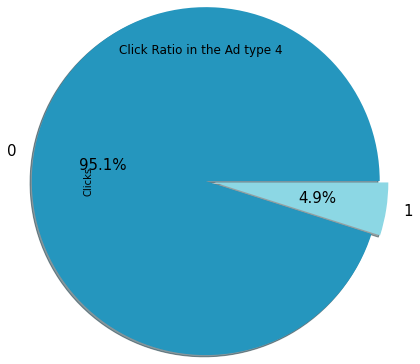

In [68]:
plot = df_4.plot.pie( title="Click Ratio in the Ad type 4", legend=False, \
                   autopct='%1.1f%%',shadow=True,subplots='True',explode=(0, 0.1),radius=2,colors=colors ,textprops={'fontsize': 15})

In [17]:
value_3=[len_notClicked_3,len_Clicked_3]
df_3 = pd.DataFrame(value_3, columns = ['Clicks'])
df_3

,Clicks
0,9545
1,146


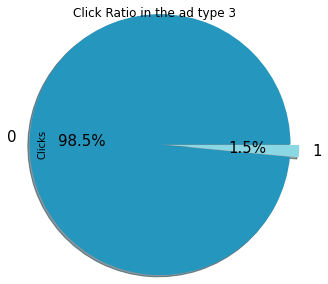

In [73]:
plot = df_3.plot.pie( title="Click Ratio in the ad type 3", legend=False, \
                   autopct='%1.1f%%',shadow=True,subplots='True',explode=(0, 0.1),radius=1.5,colors=colors ,textprops={'fontsize': 15})

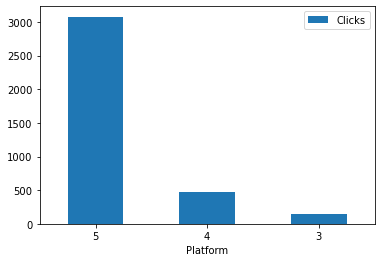

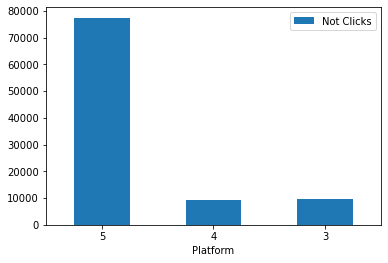

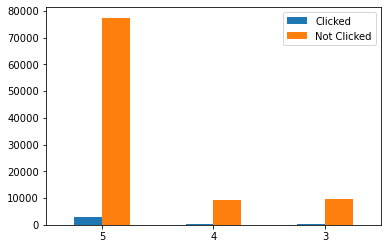

In [19]:
df_clicks = pd.DataFrame({'Platform':['5', '4', '3'], 'Clicks':[len_Clicked_5 ,len_Clicked_4,len_Clicked_3]})
ax1 = df_clicks.plot.bar(x='Platform', y='Clicks', rot=0)

df_not_clicks = pd.DataFrame({'Platform':['5', '4', '3'], 'Not Clicks':[len_notClicked_5 ,len_notClicked_4,len_notClicked_3]})
ax2 = df_not_clicks.plot.bar(x='Platform', y='Not Clicks', rot=0)

Platform = ['5', '4', '3']
clicked = [len_Clicked_5 ,len_Clicked_4,len_Clicked_3]
notclicked = [len_notClicked_5,len_notClicked_4,len_notClicked_3]
df = pd.DataFrame({'Clicked': clicked,'Not Clicked': notclicked}, index=Platform)
ax = df.plot.bar(rot=0)
#We have to do the truncating here in the last bar plot.

## Findings:

##### Ad type 5 has got the highest number of clicks and has seen the highest number of non-clicks. However, compared to the other ad types, this ad type has worked best and can be considered as our most preferred ad type amongst users.


# Hypotheses 2

H0 – The city rank of the user has no effect on the click rate. 

H1 – The city rank of the user influences the click rate. 



In [20]:
#df_sizes = pd.DataFrame(df['device_size'])
#df_sizes['device_size'] = pd.cut(x=df_sizes['device_size'], bins=[100, 150, 200,250,300,350])

In [25]:
len_city_rank_2 = len(df.loc[(df.label == 1) & (df.city_rank == 2)])
len_city_rank_3 = len(df.loc[(df.label == 1) & (df.city_rank == 3)])
len_city_rank_4 = len(df.loc[(df.label == 1) & (df.city_rank== 4)])
len_city_rank_5 = len(df.loc[(df.label == 1) & (df.city_rank== 5)])


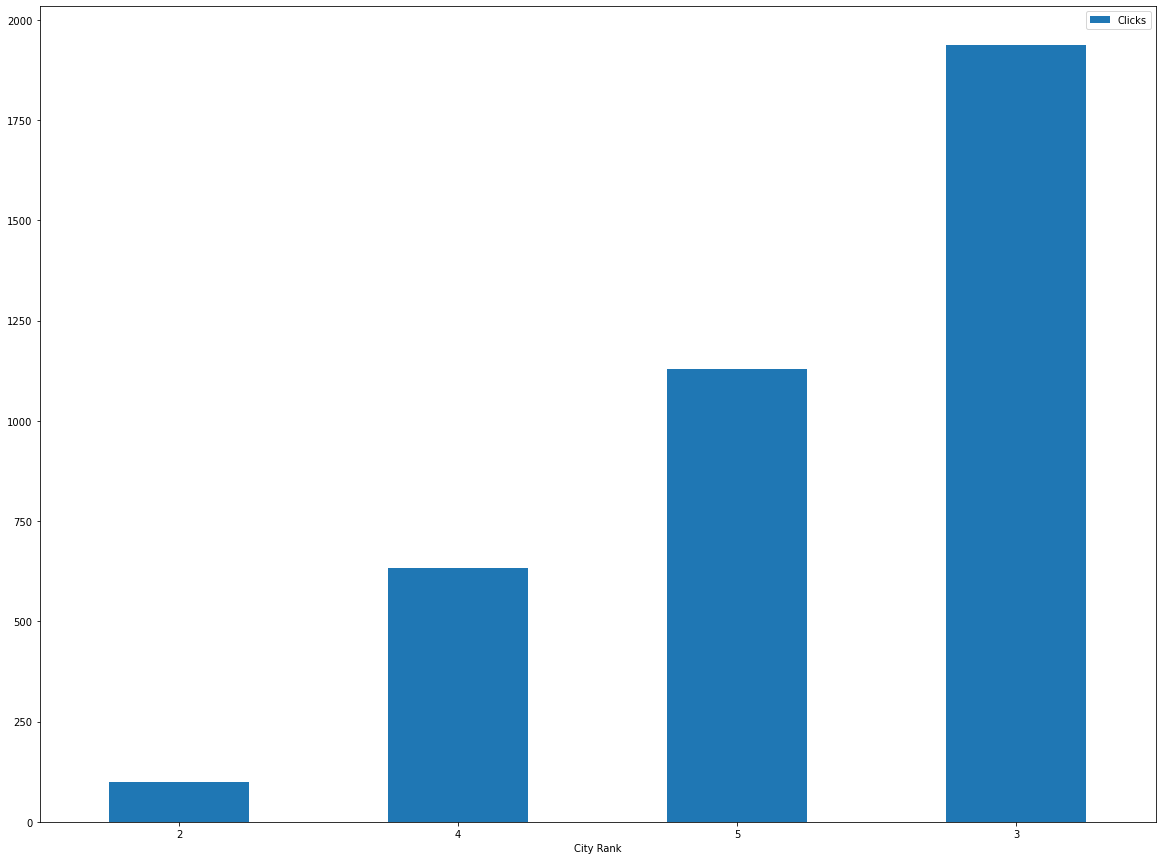

In [28]:
city_rank={'2':len_city_rank_2,'3':len_city_rank_3,'4':len_city_rank_4,'5':len_city_rank_5}

sorted_values1 = sorted(city_rank.values()) # Sort the values
sorted_dict1 = {}

for i in sorted_values1:
    for k in city_rank.keys():
        if city_rank[k] == i:
            sorted_dict1[k] = city_rank[k]
            break

#print(sorted_dict)
values_slot_dict1 = sorted_dict1.values()
values_list1 = list(values_slot_dict1)
#print(values_list)


# Creating a list of the sorted KEYS of the dict. KEYS not VALUES

def getList1(dict1):
    return dict1.keys()     
# Driver program
dict1 = sorted_dict1
key_list_sorted_dict1=getList(dict1)
key_list1 = list(key_list_sorted_dict1)
#print(key_list)



# Creating the bar plot    
df_not_clicks1 = pd.DataFrame({'Clicks':values_list1, 'City Rank':key_list1})
ax21 = df_not_clicks1.plot.bar(x='City Rank', y='Clicks', rot=0, figsize=(20, 15))

## Findings:

##### Cities with rank 3 has the highest number of clicks followed by cities with rank 5 and 4 respectively.


## Hypotheses 3

H0 - Age group of the user, type of ad and click are correlated.

H1- Age group of the user, type of ad and click are not correlated.

46
555
109
130
448
535
634
720


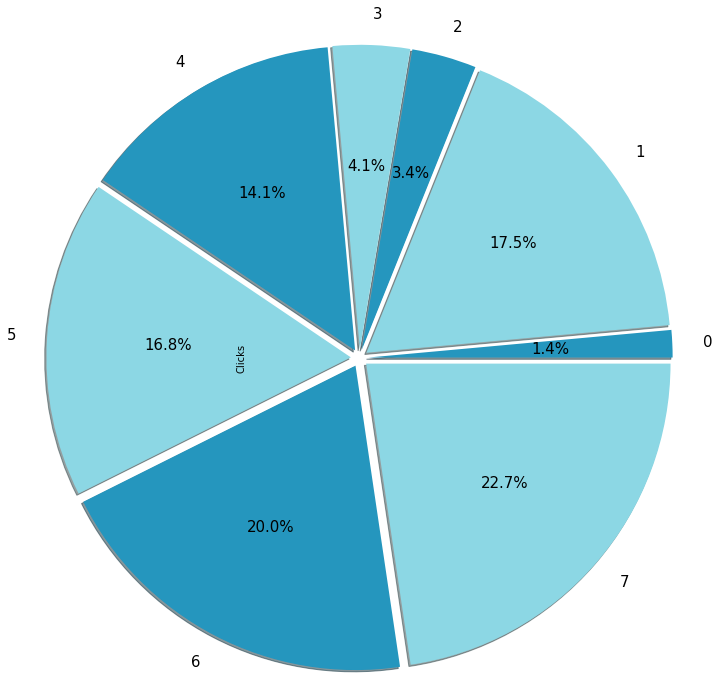

In [29]:
#len_Clicked_5
#calculating the number of the clicks of the when type is 5 and different age groups.
len_Clicked_5_age0 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.age == -1)])
len_Clicked_5_age1 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.age == 1)])
len_Clicked_5_age2 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.age == 2)])
len_Clicked_5_age3 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.age == 3)])
len_Clicked_5_age4 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.age == 4)])
len_Clicked_5_age5 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.age == 5)])
len_Clicked_5_age6 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.age == 6)])
len_Clicked_5_age7 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.age == 7)])

print(len_Clicked_5_age0)
print(len_Clicked_5_age1)
print(len_Clicked_5_age2)
print(len_Clicked_5_age3)
print(len_Clicked_5_age4)
print(len_Clicked_5_age5)
print(len_Clicked_5_age6)
print(len_Clicked_5_age7)

#df_age_5=

clicked_age_5 = [len_Clicked_5_age0,len_Clicked_5_age1,len_Clicked_5_age2,len_Clicked_5_age3,len_Clicked_5_age4,len_Clicked_5_age5,len_Clicked_5_age6,len_Clicked_5_age7]
age=['-1','1','2','3','4','5','6','7']
df_clicked_age_5 = pd.DataFrame(clicked_age_5, columns = ['Clicks'])


colors = ["#2596be","#8cd7e4"]
plot = df_clicked_age_5.plot.pie(legend=False, \
                   autopct='%1.1f%%',shadow=True,radius=3.5,subplots='True',explode=(0.1,0.1, 0.1,0.1,0.1,0.1,0.1,0.1),colors=colors ,textprops={'fontsize': 15})

## Findings:
Ad type 5 received most number of clicks from age group 7. This means, that this age group is clicking on certain type of ad (image, video, etc) and should be targeted with that particular type only

9
45
7
15
84
91
117
84


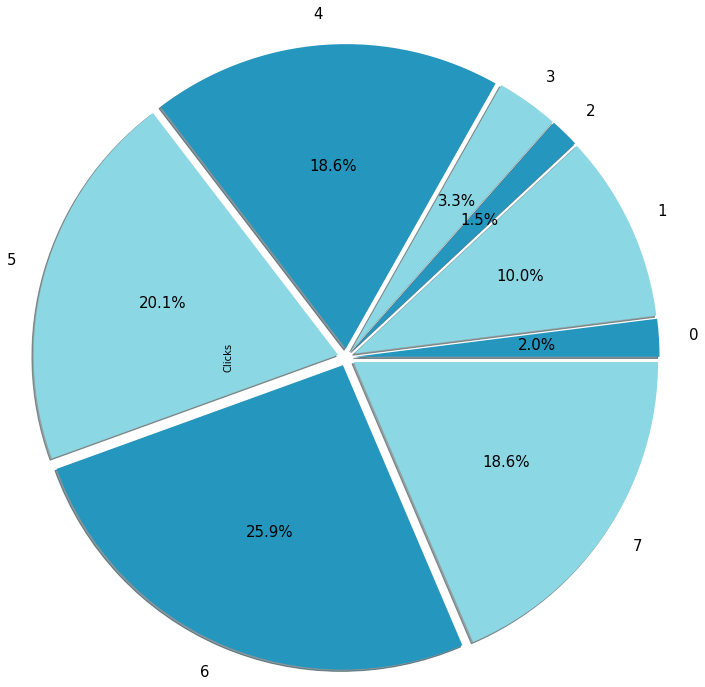

In [30]:
#len_Clicked_4
#calculating the number of the clicks of the when type is 5 and different age groups.
len_Clicked_4_age0 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.age == -1)])
len_Clicked_4_age1 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.age == 1)])
len_Clicked_4_age2 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.age == 2)])
len_Clicked_4_age3 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.age == 3)])
len_Clicked_4_age4 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.age == 4)])
len_Clicked_4_age5 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.age == 5)])
len_Clicked_4_age6 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.age == 6)])
len_Clicked_4_age7 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.age == 7)])

print(len_Clicked_4_age0)
print(len_Clicked_4_age1)
print(len_Clicked_4_age2)
print(len_Clicked_4_age3)
print(len_Clicked_4_age4)
print(len_Clicked_4_age5)
print(len_Clicked_4_age6)
print(len_Clicked_4_age7)

#df_age_5=

clicked_age_4 = [len_Clicked_4_age0,len_Clicked_4_age1,len_Clicked_4_age2,len_Clicked_4_age3,len_Clicked_4_age4,len_Clicked_4_age5,len_Clicked_4_age6,len_Clicked_4_age7]
age=['-1','1','2','3','4','5','6','7']
df_clicked_age_4 = pd.DataFrame(clicked_age_4, columns = ['Clicks'])


colors = ["#2596be","#8cd7e4"]
plot = df_clicked_age_4.plot.pie(legend=False, \
                   autopct='%1.1f%%',shadow=True,radius=3.5,subplots='True',explode=(0.1,0.1, 0.1,0.1,0.1,0.1,0.1,0.1),colors=colors ,textprops={'fontsize': 15})

## Findings:
Ad type 4 was one of the most popular type with majority of clicks coming from age group 5,6,7. That means, most of the age groups that we target ads with are clicking this particular ad type.

1
10
0
8
43
52
43
11


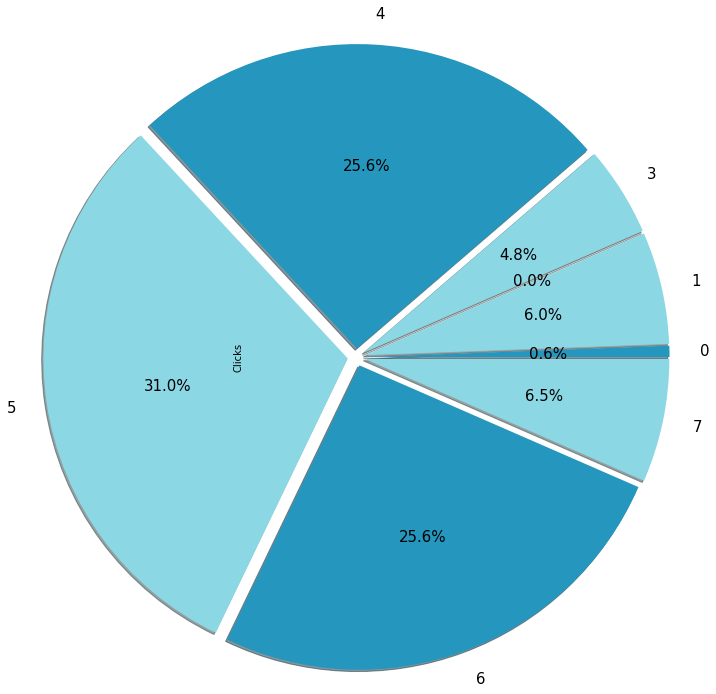

In [31]:
#len_Clicked_3
#calculating the number of the clicks of the when type is 5 and different age groups.
len_Clicked_3_age0 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.age == -1)])
len_Clicked_3_age1 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.age == 1)])
len_Clicked_3_age2 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.age == 2)])
len_Clicked_3_age3 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.age == 3)])
len_Clicked_3_age4 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.age == 4)])
len_Clicked_3_age5 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.age == 5)])
len_Clicked_3_age6 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.age == 6)])
len_Clicked_3_age7 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.age == 7)])

print(len_Clicked_3_age0)
print(len_Clicked_3_age1)
print(len_Clicked_3_age2)
print(len_Clicked_3_age3)
print(len_Clicked_3_age4)
print(len_Clicked_3_age5)
print(len_Clicked_3_age6)
print(len_Clicked_3_age7)

clicked_age_3 = [len_Clicked_3_age0,len_Clicked_3_age1,len_Clicked_3_age2,len_Clicked_3_age3,len_Clicked_3_age4,len_Clicked_3_age5,len_Clicked_3_age6,len_Clicked_3_age7]
age=['-1','1','2','3','4','5','6','7']
df_clicked_age_3 = pd.DataFrame(clicked_age_3, columns = ['Clicks'])

colors = ["#2596be","#8cd7e4"]
plot = df_clicked_age_3.plot.pie(legend=False, \
                   autopct='%1.1f%%',shadow=True,radius=3.5,subplots='True',explode=(0.1,0.1, 0.1,0.1,0.1,0.1,0.1,0.1),colors=colors ,textprops={'fontsize': 15})

## Findings:
Almost 31% of clicks on ad type 3 were generated from age group 5.

# Hypotheses 4

H0 – Network status has no influence on the click rate.

H1 - Network status has influence on the click rate.

2876
292
6
2
1


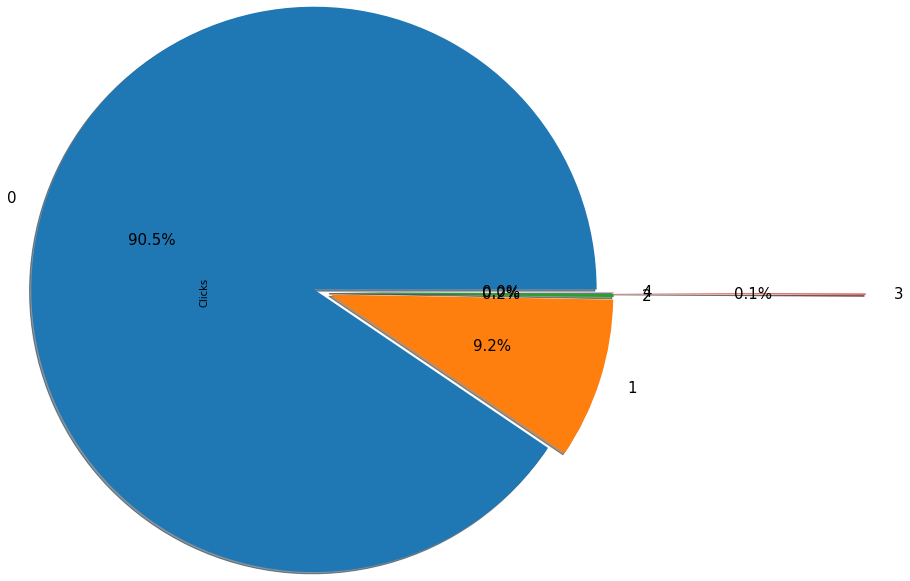

In [33]:
len_Clicked_5_net2 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.net_type == 2)])
len_Clicked_5_net3 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.net_type == 3)])
len_Clicked_5_net4 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.net_type == 4)])
len_Clicked_5_net5 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.net_type == 5)])
len_Clicked_5_net6 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.net_type == 6)])

print(len_Clicked_5_net2)
print(len_Clicked_5_net3)
print(len_Clicked_5_net4)
print(len_Clicked_5_net5)
print(len_Clicked_5_net6)



clicked_5_net = [len_Clicked_5_net2,len_Clicked_5_net3,len_Clicked_5_net4,len_Clicked_5_net5,len_Clicked_5_net6]
net=['2','3','4','5','6']
df_clicked_5_net = pd.DataFrame(clicked_5_net, columns = ['Clicks'])


#colors = ["#2596be","#8cd7e4"]
plot = df_clicked_5_net.plot.pie(legend=False, \
                   autopct='%1.1f%%',shadow=True,radius=3.25,subplots='True',explode=(0.1,0.1, 0.1,3,0.1) ,textprops={'fontsize': 15})


### Findings:

About 90 % of clicks that were made on creative type 5 had a network status of 0.

206
238
8
0
0


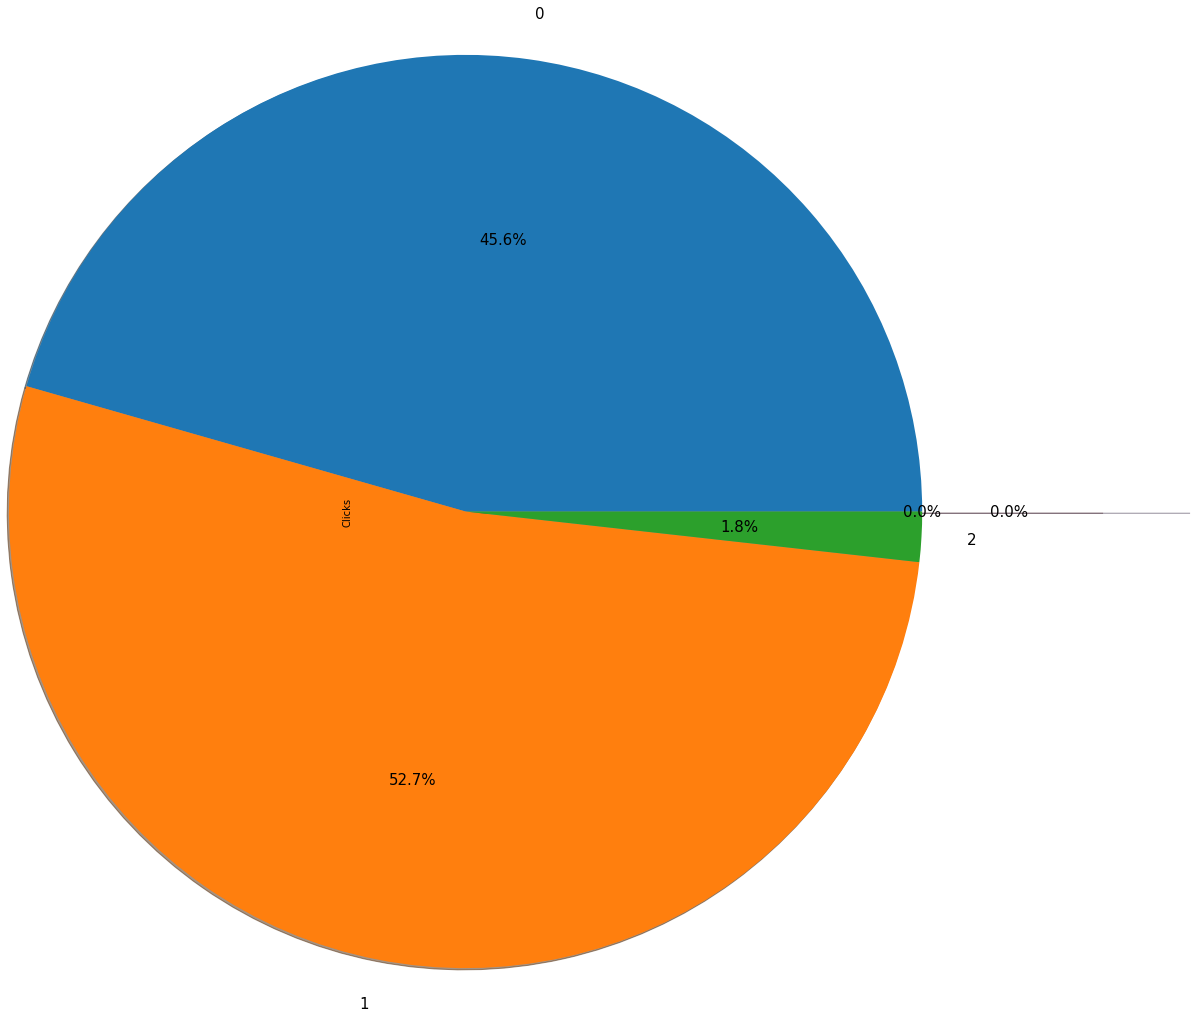

In [34]:
len_Clicked_4_net2 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.net_type == 2)])
len_Clicked_4_net3 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.net_type == 3)])
len_Clicked_4_net4 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.net_type == 4)])
len_Clicked_4_net5 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.net_type == 5)])
len_Clicked_4_net6 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.net_type == 6)])

print(len_Clicked_4_net2)
print(len_Clicked_4_net3)
print(len_Clicked_4_net4)
print(len_Clicked_4_net5)
print(len_Clicked_4_net6)


clicked_4_net = [len_Clicked_4_net2,len_Clicked_4_net3,len_Clicked_4_net4,len_Clicked_4_net5,len_Clicked_4_net6]
net=['2','3','4','5','6']
df_clicked_4_net = pd.DataFrame(clicked_4_net, columns = ['Clicks'])


#colors = ["#2596be","#8cd7e4"]
plot = df_clicked_4_net.plot.pie(legend=False, \
                   autopct='%1.1f%%',shadow=True,radius=5.25,subplots='True',explode=(0,0, 0,2.1,3.1),textprops={'fontsize': 15})



### Findings:

About 53 % of clicks that were made on creative type 4 had a network status of 1.


43
120
5
0
0


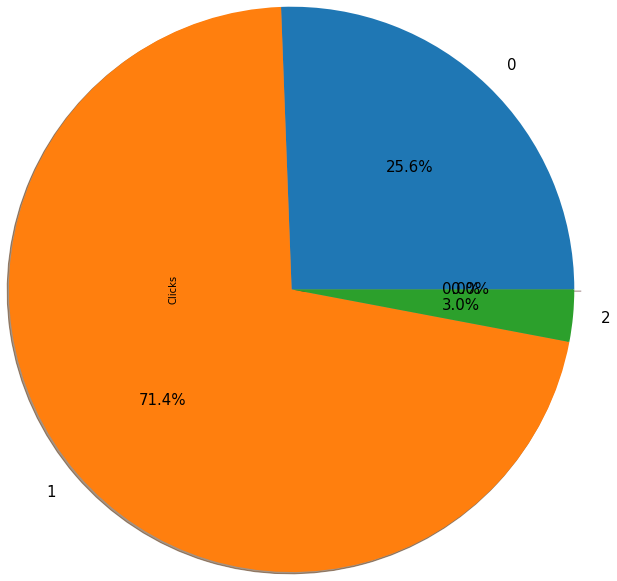

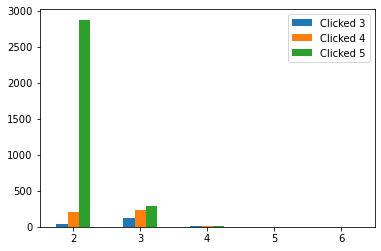

In [35]:
len_Clicked_3_net2 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.net_type == 2)])
len_Clicked_3_net3 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.net_type == 3)])
len_Clicked_3_net4 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.net_type == 4)])
len_Clicked_3_net5 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.net_type == 5)])
len_Clicked_3_net6 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.net_type == 6)])

print(len_Clicked_3_net2)
print(len_Clicked_3_net3)
print(len_Clicked_3_net4)
print(len_Clicked_3_net5)
print(len_Clicked_3_net6)


clicked_3_net = [len_Clicked_3_net2,len_Clicked_3_net3,len_Clicked_3_net4,len_Clicked_3_net5,len_Clicked_3_net6]
net=['2','3','4','5','6']
df_clicked_3_net = pd.DataFrame(clicked_3_net, columns = ['Clicks'])


#colors = ["#2596be","#8cd7e4"]
plot = df_clicked_3_net.plot.pie(legend=False, \
                   autopct='%1.1f%%',shadow=True,radius=3.25,subplots='True',explode=(0,0, 0,0.1,0) ,textprops={'fontsize': 15})





net = ['2', '3', '4','5','6']
clicked_ = [len_Clicked_5 ,len_Clicked_4,len_Clicked_3]
notclicked = [len_notClicked_5,len_notClicked_4,len_notClicked_3]
df = pd.DataFrame({'Clicked 3': clicked_3_net,'Clicked 4': clicked_4_net,'Clicked 5': clicked_5_net}, index=net)
ax = df.plot.bar(rot=0)

### Findings:
About 71.5 % of clicks that were made on creative type 3 had a network status of 1.

# Hypotheses 5

H0 - Gender of the user, ad type and clicks are correlated.

H1 - Gender of the user, ad type and clicks are not correlated.


### When ad type is 3

In [50]:
len_Clicked_3_gen2 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.gender == 2)])
len_Clicked_3_gen3 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.gender == 3)])
len_Clicked_3_gen4 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 3) & (df.gender == 4)])

print("Number of clicks when ad type is 3 and Gender is 0 -->",len_Clicked_3_gen2)
print("Number of clicks when ad type is 3 and Gender is 1 -->",len_Clicked_3_gen3)
print("Number of clicks when ad type is 5 and Gender is 2 -->",len_Clicked_3_gen4)

clicked_ad_3_gen = [len_Clicked_3_gen2,len_Clicked_3_gen3,len_Clicked_3_gen4]
gen=['2','3','4']
df_clicked_ad_3_gen = pd.DataFrame(clicked_ad_3_gen, columns = ['Clicks'])

Number of clicks when ad type is 3 and Gender is 0 --> 134
Number of clicks when ad type is 3 and Gender is 1 --> 1
Number of clicks when ad type is 5 and Gender is 2 --> 41


### Pie Chart for clicks on Ad type 3

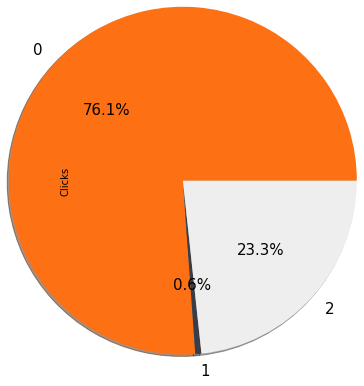

In [62]:
colors = ["#FD7014","#393E46","#EEEEEE"]


plot = df_clicked_ad_3_gen.plot.pie(legend=False, \
                  autopct='%1.1f%%',shadow=True,radius=2,subplots='True',explode=(0,0, 0),colors =colors ,textprops={'fontsize': 15})

### Findings:

Around 76.1 % of gender code 0 users clicked on ad type 3

### When Ad type is 4

In [56]:
# Calculating the lenght of the clicks made by the different gender when the type of ad is 4.

len_Clicked_4_gen2 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.gender == 2)])
len_Clicked_4_gen3 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.gender == 3)])
len_Clicked_4_gen4 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 4) & (df.gender == 4)])

print("Number of clicks when ad type is 4 and Gender is 2 -->",len_Clicked_4_gen2)
print("Number of clicks when ad type is 4 and Gender is 3 -->",len_Clicked_4_gen3)
print("Number of clicks when ad type is 4 and Gender is 4 -->",len_Clicked_4_gen4)

#creating the data frame of the lenghts.
clicked_ad_4_gen = [len_Clicked_4_gen2,len_Clicked_4_gen3,len_Clicked_4_gen4]
gen=['2','3','4']
df_clicked_ad_4_gen = pd.DataFrame(clicked_ad_4_gen, columns = ['Clicks'])

Number of clicks when ad type is 4 and Gender is 2 --> 390
Number of clicks when ad type is 4 and Gender is 3 --> 13
Number of clicks when ad type is 4 and Gender is 4 --> 89


### Pie Chart for clicks on Ad type 4

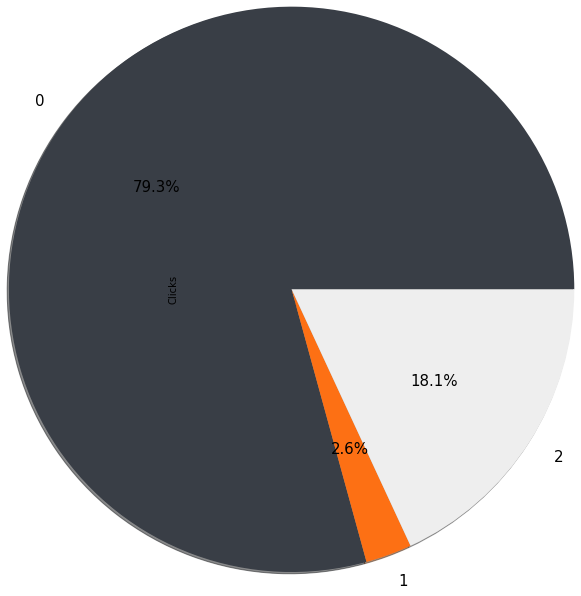

In [57]:
#Plotting the pie chart graph.
colors = ["#393E46","#FD7014","#EEEEEE"]
plot = df_clicked_ad_4_gen.plot.pie(legend=False, \
                   autopct='%1.1f%%',shadow=True,radius=3.25,subplots='True',explode=(0,0, 0), colors=colors ,textprops={'fontsize': 15})


### Findings:

Ad type 4 was clicked on by 79% of gender code 0 then by gender 2 users.

In [59]:
# Calculating the lenght of the clicks made by the different gender when the type of ad is 5.

len_Clicked_5_gen2 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.gender == 2)])
len_Clicked_5_gen3 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.gender == 3)])
len_Clicked_5_gen4 = len(df.loc[(df.label == 1) & (df.inter_type_cd == 5) & (df.gender == 4)])

print("Number of clicks when ad type is 5 and Gender is 2 -->",len_Clicked_5_gen2)
print("Number of clicks when ad type is 5 and Gender is 3 -->",len_Clicked_5_gen3)
print("Number of clicks when ad type is 5 and Gender is 4 -->",len_Clicked_5_gen4)
print()
print("Total Number of clicks when ad type is 5 -->",len_Clicked_5_gen4+len_Clicked_5_gen3+len_Clicked_5_gen2)



#creating the data frame of the lenghts.

clicked_ad_5_gen = [len_Clicked_5_gen2,len_Clicked_5_gen3,len_Clicked_5_gen4]
gen=['2','3','4']
df_clicked_ad_5_gen = pd.DataFrame(clicked_ad_5_gen, columns = ['Clicks'])


Number of clicks when ad type is 5 and Gender is 2 --> 2390
Number of clicks when ad type is 5 and Gender is 3 --> 105
Number of clicks when ad type is 5 and Gender is 4 --> 715

Total Number of clicks when ad type is 5 --> 3210


### Pie Chart for clicks on Ad type 5

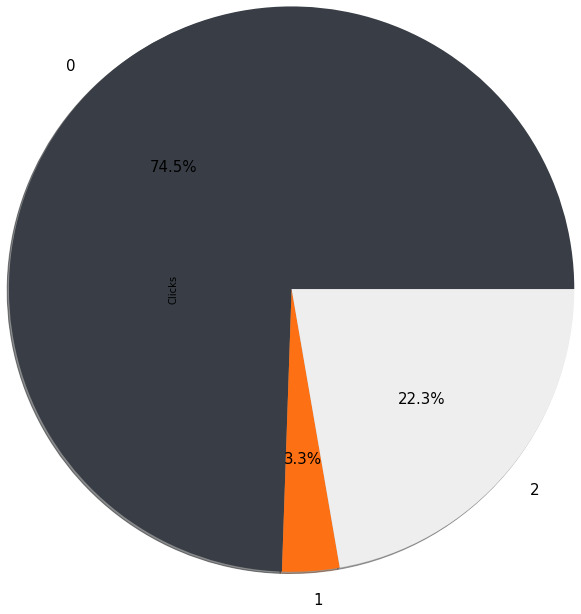

In [60]:
#Plotting the pie chart graph.
colors = ["#393E46","#FD7014","#EEEEEE"]
plot = df_clicked_ad_5_gen.plot.pie(legend=False, \
                   autopct='%1.1f%%',shadow=True,radius=3.25,subplots='True',explode=(0,0, 0), colors = colors ,textprops={'fontsize': 15})

### Findings:
Ad type 5 was popular amongst users with gender code 0

# Hypotheses 6

H0 – Slot of the ad (placement) has no influence on the click rate.

H1 - Slot of the ad (placement) has influence on the click rate.


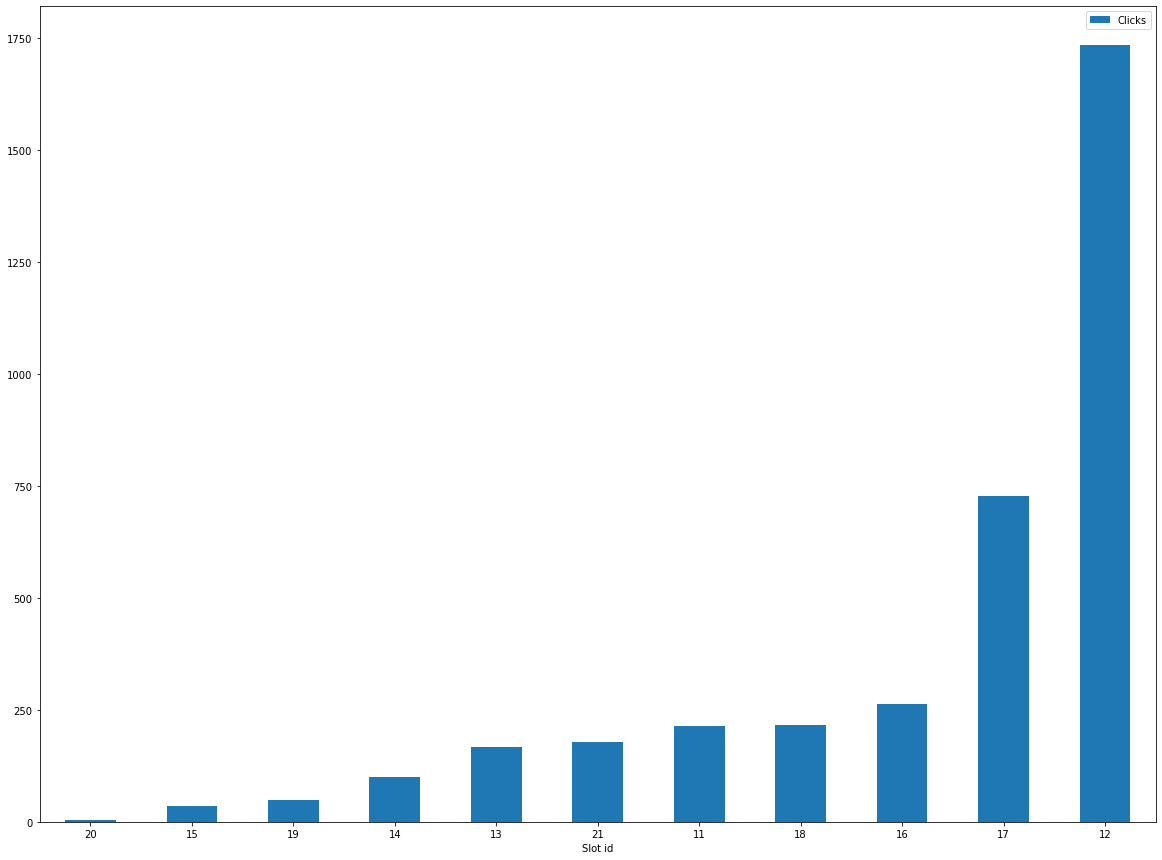

In [27]:
# Calculating the number of the clicks corresponding to each slot id

len_Clicked_slot_11 = len(df.loc[(df.label == 1) & (df.slot_id == 11)])
len_Clicked_slot_12 = len(df.loc[(df.label == 1) & (df.slot_id == 12)])
len_Clicked_slot_13 = len(df.loc[(df.label == 1) & (df.slot_id == 13)])
len_Clicked_slot_14 = len(df.loc[(df.label == 1) & (df.slot_id == 14)])
len_Clicked_slot_15 = len(df.loc[(df.label == 1) & (df.slot_id == 15)])
len_Clicked_slot_16 = len(df.loc[(df.label == 1) & (df.slot_id == 16)])
len_Clicked_slot_17 = len(df.loc[(df.label == 1) & (df.slot_id == 17)])
len_Clicked_slot_18 = len(df.loc[(df.label == 1) & (df.slot_id == 18)])
len_Clicked_slot_19 = len(df.loc[(df.label == 1) & (df.slot_id == 19)])
len_Clicked_slot_20 = len(df.loc[(df.label == 1) & (df.slot_id == 20)])
len_Clicked_slot_21 = len(df.loc[(df.label == 1) & (df.slot_id == 21)])
len_Clicked_slot_22 = len(df.loc[(df.label == 1) & (df.slot_id == 22)])




# creating the dictionary of the lenght of the slot id.

slot_dict={'11':len_Clicked_slot_11,'12':len_Clicked_slot_12,'13':len_Clicked_slot_13,'14':len_Clicked_slot_14,
           '15':len_Clicked_slot_15,'16':len_Clicked_slot_16,'17':len_Clicked_slot_17,'18':len_Clicked_slot_18,
           '19':len_Clicked_slot_19,'20':len_Clicked_slot_20,'21':len_Clicked_slot_21}



# creating a list of the sorted values of the dict. VALUES not KEY

sorted_values = sorted(slot_dict.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in slot_dict.keys():
        if slot_dict[k] == i:
            sorted_dict[k] = slot_dict[k]
            break

#print(sorted_dict)
values_slot_dict = sorted_dict.values()
values_list = list(values_slot_dict)
#print(values_list)




# Creating a list of the sorted KEYS of the dict. KEYS not VALUES

def getList(dict):
    return dict.keys()     
# Driver program
dict = sorted_dict
key_list_sorted_dict=getList(dict)
key_list = list(key_list_sorted_dict)
#print(key_list)



#print(sorted_dict)



# Creating the bar plot    
df_not_clicks = pd.DataFrame({'Clicks':values_list, 'Slot id':key_list})
ax2 = df_not_clicks.plot.bar(x='Slot id', y='Clicks', rot=0, figsize=(20, 15))

    
# Creating the pareto chart of the bar graphs made.    
#ax1=pareto_plot(ax2, x='Slot id', y='Clicks', title='Ice Cream Sales')

### Findings:

Slot id 12 generated the highest number of clicks amongst the users on all ad types.

# Conclusion

### The summary of findings: 

#### Hypotheses 1
Ad type 5 has got the highest number of clicks and has seen the highest number of non-clicks. 

#### Hypotheses 2
Cities with rank 3 has the highest number of clicks followed by cities with rank 5 and 4 respectively

#### Hypotheses 3
Ad type 5 received most number of clicks from age group 7. This means, that this age group is clicking on certain type of ad (image, video, etc) and should be targeted with that particular type only

Ad type 4 was one of the most popular type with majority of clicks coming from age group 5,6,7. That means, most of the age groups that we target ads with are clicking this particular ad type.

Almost 31% of clicks on ad type 3 were generated from age group 5.

#### Hypotheses 4
About 90 % of clicks that were made on creative type 5 had a network status of 0.

About 53 % of clicks that were made on creative type 4 had a network status of 1.

About 71.5 % of clicks that were made on creative type 3 had a network status of 1.

#### Hypotheses 5
Around 76.1 % of gender code 0 users clicked on ad type 3

Ad type 4 was clicked on by 79% of gender code 0 and then by gender 2 users.

Ad type 5 was popular amongst users with gender code 0

#### Hypotheses 6
Slot id 12 generated the highest number of clicks amongst the users on all ad types.

### Business implications for audiences

Internet marketing and advertising is evolving by the day. New ad technology, availability of data, and increasing use of internet has made the digital advertising market very competitive. In order to effectively allocate funds to different digital platforms for advertising, ascertaining the target audience, this study was important. Digital Marketing Managers can do a thorough study like we have done above and evaluate the variables that are important to them before planning a new campaign. This will not only help them understand their audience better but also optimize their ad performance and increase profitability.

### Limitations of this project

We are retreiving a subset of the dataset, that is 1/10th of the actual length of the datset.
So, the results might be affected with a slight percentage with every run.

### References

1. https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7
2. https://pandas.pydata.org
3. https://matplotlib.org/stable/index.html
4. https://www.geeksforgeeks.org
5. https://www.kaggle.com/tomerzemelman/ctr-data-exploration